In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression

In [46]:
path = os.getcwd() + '/data/train_data.csv'
df = pd.read_csv(path)

In [47]:
with open('models/preprocessor.pkl', 'rb') as f:
    preprocessor = pickle.load(f)

In [48]:
fraud_df = df[df['EVENT_LABEL']==1]
legit_df = df[df['EVENT_LABEL']==0][:len(fraud_df)]
under_df = pd.concat([fraud_df, legit_df])
under_df = under_df.sample(frac=1)

EVENT_LABEL
0    0.5
1    0.5
Name: count, dtype: float64


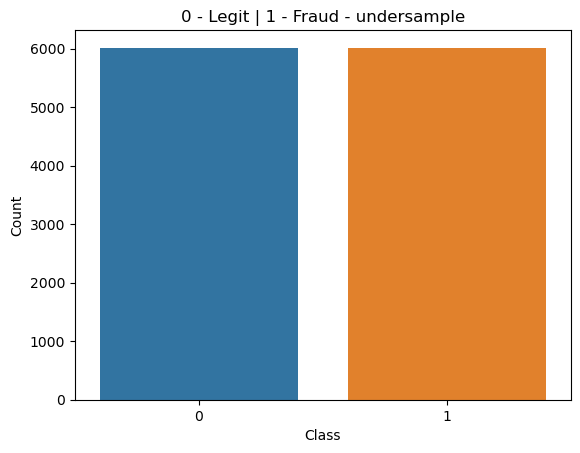

In [49]:
print(under_df['EVENT_LABEL'].value_counts()/len(under_df))
sns.countplot(under_df, x='EVENT_LABEL')
plt.title('0 - Legit | 1 - Fraud - undersample')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [50]:
X = under_df.drop(columns=['EVENT_LABEL'])
y = under_df['EVENT_LABEL']
X = preprocessor.transform(X)

In [51]:
LogReg = LogisticRegression(solver='newton-cg')
LogReg.fit(X, y)

LogisticRegression(solver='newton-cg')

In [52]:
with open('models/LogReg.pkl','wb') as f:
    pickle.dump(LogReg, f)
f.close()